In [123]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import pprint as pp
from dfply import *
import seaborn as sns
import scikitplot as skplt

from fancyimpute import MICE
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV


import pickle

# scikit learn models
from sklearn.linear_model import Ridge, Lasso, BayesianRidge, ElasticNet, LinearRegression, RANSACRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, BaggingRegressor
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from sklearn.feature_selection import SelectFromModel


from sklearn.externals import joblib


from sklearn.metrics import roc_curve, accuracy_score, mean_squared_error,recall_score,roc_auc_score,r2_score,mean_squared_error



from pprint import pprint


%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 8


In [22]:
### Source: https://stackoverflow.com/questions/17978092/combine-date-and-time-columns-using-python-pandas
forecasting_main_data = pd.read_csv('data/forecasting_dataset.csv', parse_dates=[['date','time']])
forecasting_main_data.shape


(8421, 15)

In [23]:
forecasting_main_data.head()

,date_time,y,co_gt,nhmc,c6h6,s2,nox,s3,no2,s4,s5,t,rh,ah,level
0,2004-10-13 20:00:00,943,-200.0,-200.0,7.2,867.0,-200.0,834.0,-200.0,1314.0,891.0,14.8,57.3,0.9603,NaN
1,2004-08-10 03:00:00,919,0.5,-200.0,3.9,704.0,-200.0,861.0,-200.0,1603.0,860.0,24.4,65.0,1.9612,Low
2,2004-06-21 08:00:00,1221,3.7,-200.0,23.3,1386.0,NaN,626.0,109.0,2138.0,NaN,23.3,38.6,1.0919,High
3,2004-07-12 12:00:00,1024,2.1,-200.0,12.1,1052.0,183.0,779.0,NaN,1690.0,952.0,28.5,27.3,1.0479,High
4,2004-12-14 12:00:00,1377,4.4,-200.0,21.7,1342.0,786.0,499.0,206.0,1546.0,2006.0,12.9,54.1,0.8003,High


In [37]:
forecasting_main_data.describe()

,y,co_gt,nhmc,c6h6,s2,nox,s3,no2,s4,s5,t,rh,ah
count,8421.000000,7980.000000,7987.000000,8008.000000,8000.000000,7996.000000,8005.000000,7966.000000,8027.000000,8021.000000,7997.000000,7985.000000,7996.000000
mean,1042.105926,-37.626153,-154.691373,1.134540,898.965250,156.620060,801.763398,50.172483,1414.505295,970.777709,9.904877,38.029105,-7.792764
std,340.287650,80.407058,147.073276,43.563292,350.196842,260.224266,328.978770,129.871132,478.101456,459.593401,44.466069,53.944638,41.250356
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,915.000000,0.500000,-200.000000,4.100000,719.000000,42.000000,647.000000,47.000000,1235.000000,702.000000,11.400000,33.400000,0.727475
50%,1050.000000,1.500000,-200.000000,8.100000,903.000000,128.000000,802.000000,92.000000,1476.000000,939.000000,18.000000,48.100000,1.005100
75%,1220.000000,2.600000,-200.000000,13.900000,1113.000000,269.000000,973.000000,128.000000,1684.000000,1250.000000,24.700000,61.600000,1.338700
max,2040.000000,11.900000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


### Looking at types

In [11]:
(forecasting_main_data.dtypes)

date      object
time      object
y          int64
co_gt    float64
nhmc     float64
c6h6     float64
s2       float64
nox      float64
s3       float64
no2      float64
s4       float64
s5       float64
t        float64
rh       float64
ah       float64
level     object
dtype: object

### Checking for missing values

In [13]:
forecasting_main_data.isnull().sum()

date       0
time       0
y          0
co_gt    441
nhmc     434
c6h6     413
s2       421
nox      425
s3       416
no2      455
s4       394
s5       400
t        424
rh       436
ah       425
level    418
dtype: int64

In [15]:
forecasting_main_data.isnull().mean()

date     0.000000
time     0.000000
y        0.000000
co_gt    0.052369
nhmc     0.051538
c6h6     0.049044
s2       0.049994
nox      0.050469
s3       0.049400
no2      0.054032
s4       0.046788
s5       0.047500
t        0.050350
rh       0.051775
ah       0.050469
level    0.049638
dtype: float64

In [28]:
forecasting_main_data.level.value_counts()

High         4897
Very low     1590
Low          1265
Moderate      239
Very High      12
Name: level, dtype: int64

### Replacing categorical value with mode.

In [30]:
forecasting_main_data['level'].fillna(forecasting_main_data['level'].mode()[0], inplace=True)


In [31]:
forecasting_main_data.isnull().mean()

date_time    0.000000
y            0.000000
co_gt        0.052369
nhmc         0.051538
c6h6         0.049044
s2           0.049994
nox          0.050469
s3           0.049400
no2          0.054032
s4           0.046788
s5           0.047500
t            0.050350
rh           0.051775
ah           0.050469
level        0.000000
dtype: float64

In [39]:
forecasting_main_data.sort_values(['date_time'], inplace=True)
forecasting_main_data.reset_index(drop = True).head(10)


,date_time,y,co_gt,nhmc,c6h6,s2,nox,s3,no2,s4,s5,t,rh,ah,level
0,2004-03-10 18:00:00,1360,2.6,150.0,11.9,NaN,166.0,1056.0,113.0,1692.0,NaN,13.6,48.9,0.7578,High
1,2004-03-10 19:00:00,1292,2.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,High
2,2004-03-10 20:00:00,1402,2.2,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,NaN,0.7502,High
3,2004-03-10 21:00:00,1376,2.2,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,High
4,2004-03-10 22:00:00,1272,1.6,51.0,6.5,836.0,131.0,1205.0,116.0,NaN,1110.0,NaN,59.6,0.7888,High
5,2004-03-10 23:00:00,1197,1.2,38.0,4.7,750.0,89.0,1337.0,96.0,1393.0,949.0,11.2,59.2,0.7848,High
6,2004-03-11 00:00:00,1185,1.2,31.0,3.6,690.0,62.0,1462.0,77.0,1333.0,733.0,11.3,56.8,0.7603,High
7,2004-03-11 01:00:00,1136,NaN,31.0,3.3,672.0,NaN,1453.0,76.0,1333.0,730.0,10.7,60.0,NaN,Moderate
8,2004-03-11 02:00:00,1094,0.9,24.0,2.3,609.0,45.0,1579.0,60.0,1276.0,620.0,10.7,59.7,0.7648,Low
9,2004-03-11 03:00:00,1010,0.6,19.0,1.7,561.0,-200.0,1705.0,-200.0,1235.0,501.0,10.3,60.2,0.7517,Low


### Handling Missing Values

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020755F0D630>,
      dtype=object)

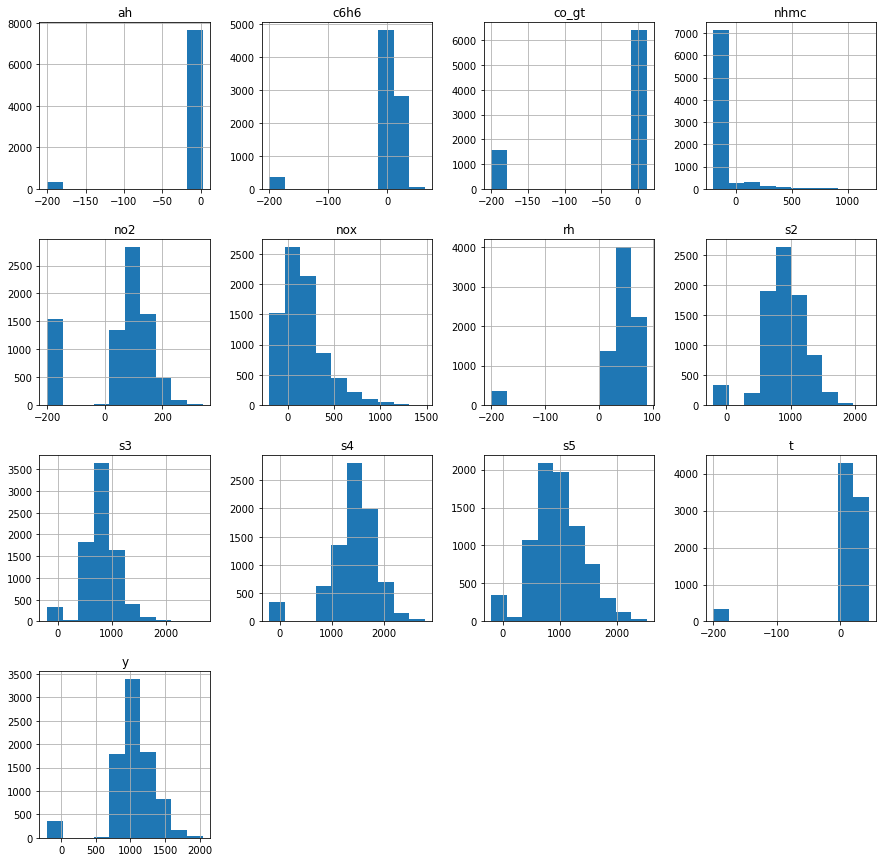

In [41]:
 forecasting_main_data.select_dtypes(include = ['float64','int64']).hist(figsize = (15,15))

### Filling NA's.

In [44]:
incomplete = forecasting_main_data.select_dtypes(include = ['float64']).values.copy()

In [56]:
mice = MICE()
complete = mice.complete(incomplete)

[MICE] Completing matrix with shape (8421, 12)
[MICE] Starting imputation round 1/110, elapsed time 0.002
[MICE] Starting imputation round 2/110, elapsed time 0.026
[MICE] Starting imputation round 3/110, elapsed time 0.049
[MICE] Starting imputation round 4/110, elapsed time 0.075
[MICE] Starting imputation round 5/110, elapsed time 0.092
[MICE] Starting imputation round 6/110, elapsed time 0.111
[MICE] Starting imputation round 7/110, elapsed time 0.128
[MICE] Starting imputation round 8/110, elapsed time 0.145
[MICE] Starting imputation round 9/110, elapsed time 0.163
[MICE] Starting imputation round 10/110, elapsed time 0.179
[MICE] Starting imputation round 11/110, elapsed time 0.195
[MICE] Starting imputation round 12/110, elapsed time 0.214
[MICE] Starting imputation round 13/110, elapsed time 0.239
[MICE] Starting imputation round 14/110, elapsed time 0.265
[MICE] Starting imputation round 15/110, elapsed time 0.287
[MICE] Starting imputation round 16/110, elapsed time 0.304
[M

In [48]:
df_complete = pd.DataFrame(complete)
df_complete.columns = forecasting_main_data.select_dtypes(include = ['float64']).columns
df_complete.index = forecasting_main_data.select_dtypes(include = ['float64']).index

#### No more misssing values

In [55]:
df_complete.isnull().mean()

co_gt    0.0
nhmc     0.0
c6h6     0.0
s2       0.0
nox      0.0
s3       0.0
no2      0.0
s4       0.0
s5       0.0
t        0.0
rh       0.0
ah       0.0
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002075B5C09B0>,
      dtype=object)

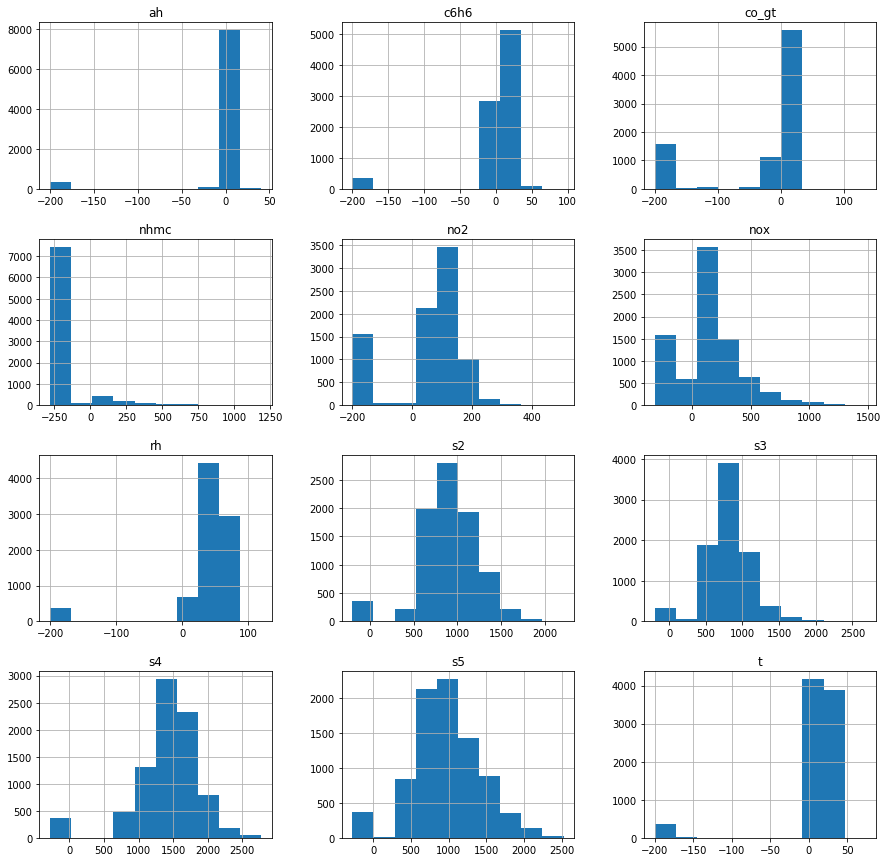

In [51]:
df_complete.select_dtypes(include = ['float64']).hist(figsize = (15,15))

In [60]:
### Converting categorical variables to dummys. Need only one column - operational_setting_3_High.
forecasting_main_data = pd.concat([forecasting_main_data.drop('level', axis = 1),
                    pd.get_dummies(forecasting_main_data.level,prefix = 'level')],axis = 1)
forecasting_main_data.update(df_complete)


In [65]:
### No missing values.
forecasting_main_data.isnull().mean()

date_time          0.0
y                  0.0
co_gt              0.0
nhmc               0.0
c6h6               0.0
s2                 0.0
nox                0.0
s3                 0.0
no2                0.0
s4                 0.0
s5                 0.0
t                  0.0
rh                 0.0
ah                 0.0
level_High         0.0
level_Low          0.0
level_Moderate     0.0
level_Very High    0.0
level_Very low     0.0
dtype: float64

### Feature Engineering - Generate y 6 hours later label

In [70]:
### getting 6 hours later values.
df_processed_complete = forecasting_main_data >> mutate(y_later = lead(X.y, 6))


In [76]:
### checking if the last 6 are null 
df_processed_complete.tail(6)

,date_time,y,co_gt,nhmc,c6h6,s2,nox,s3,no2,s4,s5,t,rh,ah,level_High,level_Low,level_Moderate,level_Very High,level_Very low,y_later
859,2005-02-24 09:00:00,1332,3.8,-200.000000,14.500000,1132.0,645.0,522.0,269.0,1439.0,1381.655511,3.9000,83.9,0.6847,1,0,0,0,0,NaN
5180,2005-02-24 10:00:00,1178,2.7,-200.000000,9.000000,939.0,573.0,640.0,244.0,1228.0,1140.737484,4.1000,83.9,0.6967,1,0,0,0,0,NaN
7748,2005-02-24 11:00:00,1093,1.8,-143.696138,6.500000,836.0,414.0,728.0,232.0,1142.0,1025.000000,-6.3915,82.0,0.6997,1,0,0,0,0,NaN
5427,2005-02-24 12:00:00,1060,1.4,-200.000000,5.400000,784.0,314.0,770.0,196.0,1117.0,941.000000,5.5000,79.5,0.7238,1,0,0,0,0,NaN
5825,2005-02-24 13:00:00,1121,1.7,-200.000000,7.400000,873.0,317.0,697.0,195.0,1206.0,1000.000000,6.7000,76.2,0.7519,1,0,0,0,0,NaN
5911,2005-02-24 14:00:00,1118,1.9,-200.000000,-5.772304,888.0,290.0,685.0,189.0,1223.0,962.000000,7.9000,69.0,0.7394,1,0,0,0,0,NaN


In [77]:
# remove the last 6 rows
df_processed_complete.drop(df_processed_complete.tail(6).index,inplace=True)

In [78]:
## check if there no nulls
df_processed_complete.tail(10)

,date_time,y,co_gt,nhmc,c6h6,s2,nox,s3,no2,s4,s5,t,rh,ah,level_High,level_Low,level_Moderate,level_Very High,level_Very low,y_later
6490,2005-02-23 23:00:00,1016,1.5,-200.0,4.6,744.000000,231.000000,841.589635,167.000000,1053.0,1020.0,4.2,77.9,0.647900,1,0,0,0,0,883.0
2059,2005-02-24 00:00:00,1018,1.6,-200.0,4.7,750.000000,248.000000,831.000000,172.000000,1051.0,916.0,3.2,83.0,0.645000,1,0,0,0,0,968.0
2578,2005-02-24 01:00:00,937,1.1,-200.0,2.6,625.000000,232.466415,977.000000,120.000000,983.0,798.0,5.1,74.5,0.662600,1,0,0,0,0,1071.0
2446,2005-02-24 02:00:00,949,0.9,-200.0,2.9,681.621162,117.000000,956.000000,100.000000,1023.0,762.0,4.0,80.8,0.666600,0,1,0,0,0,1310.0
6746,2005-02-24 03:00:00,895,0.7,-200.0,1.5,545.000000,-200.000000,1080.000000,-200.000000,964.0,685.0,4.3,81.0,0.677000,0,1,0,0,0,1332.0
5886,2005-02-24 04:00:00,884,-200.0,-200.0,1.3,528.000000,96.000000,1148.000000,-17.920044,960.0,619.0,2.9,85.3,0.650300,0,0,0,0,1,1178.0
2304,2005-02-24 05:00:00,883,0.6,-200.0,1.2,518.000000,87.000000,1135.000000,81.000000,962.0,606.0,3.3,84.5,0.661200,0,1,0,0,0,1093.0
3005,2005-02-24 06:00:00,968,0.8,-200.0,3.0,652.000000,197.000000,937.000000,131.000000,1051.0,788.0,3.6,84.4,0.672400,1,0,0,0,0,1060.0
3485,2005-02-24 07:00:00,1071,1.5,-200.0,5.5,787.000000,290.000000,755.000000,170.000000,1146.0,947.0,3.8,83.8,0.677100,1,0,0,0,0,1121.0
3429,2005-02-24 08:00:00,1310,3.1,-200.0,12.9,1053.221052,621.000000,555.000000,267.000000,1400.0,1254.0,4.1,82.5,-14.658038,1,0,0,0,0,1118.0


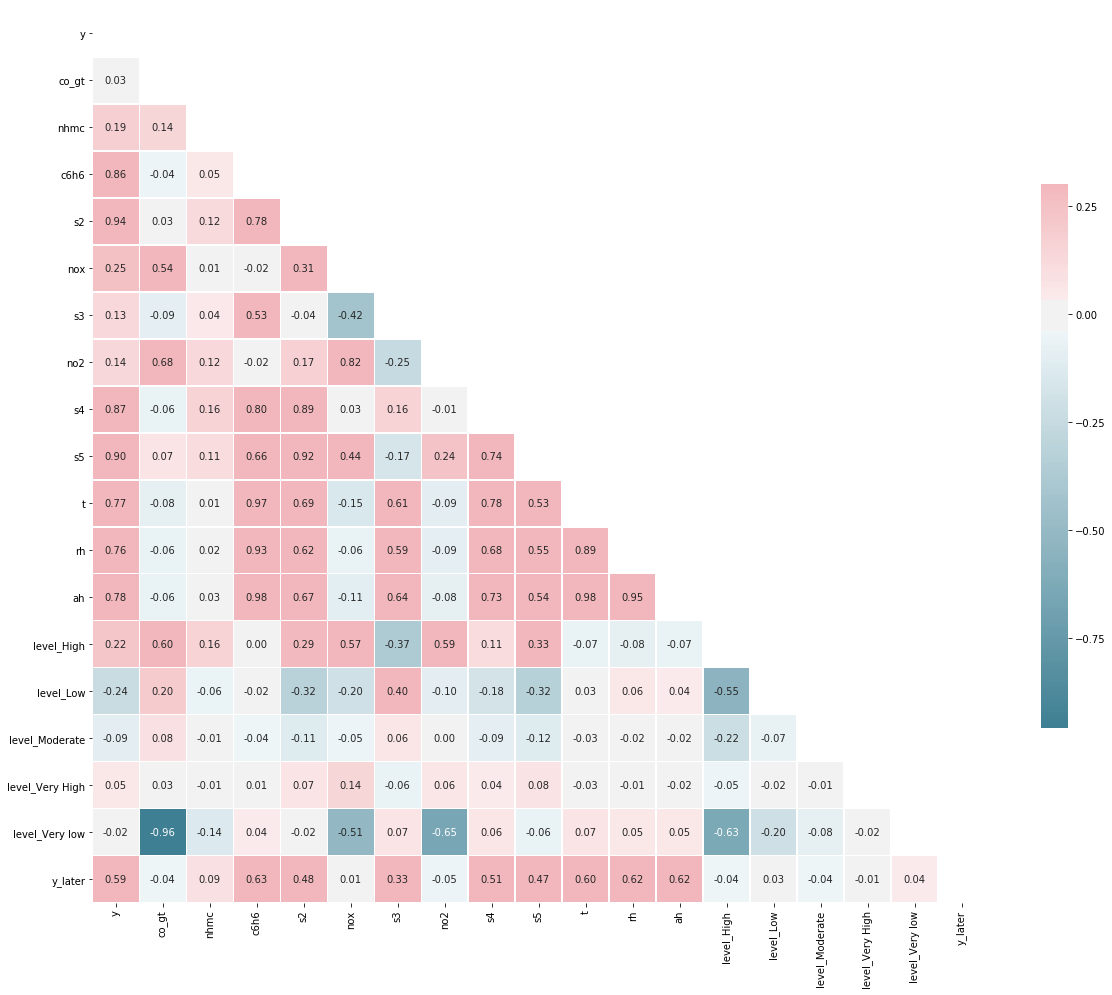

In [79]:
### source: https://seaborn.pydata.org/examples/many_pairwise_correlations.html
corr = df_processed_complete.select_dtypes(include = ['int64','float64','uint8']).corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},fmt='.2f', annot_kws={'size': 10})

In [80]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(df_processed_complete.drop(['date_time','y','y_later'],axis=1), df_processed_complete[['y_later']], test_size=0.15, random_state=9)
# Train validation split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=9)

In [96]:
# Fitting general models:
models = {
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Elastic Net': ElasticNet(),
    'Linear regression': LinearRegression(), 
    'Gradient boosting': GradientBoostingRegressor(),
    'Random Forest': RandomForestRegressor(),
    'xgboost regressor': XGBRegressor(),
    'Bagging regressor': BaggingRegressor()
}

In [97]:
for name, clf in models.items():
  
    print("Fitting {} model...\n".format(name))
    clf.fit(X_train, y_train.values.ravel())
    print("Train R2 score is:", r2_score(y_train, clf.predict(X_train)).round(3))
    print("Train RMSE is: {} \n".format(np.sqrt(mean_squared_error(y_train, clf.predict(X_train)).round(3))))
   

    print("Validating {} model...\n".format(name))
    print("Validation R2 score is:", r2_score(y_val, clf.predict(X_val)).round(3))
    print("Validation RMSE is {} \n".format(np.sqrt(mean_squared_error(y_val, clf.predict(X_val))).round(3)))
    
    print("Testing {} model...\n".format(name))
    print("Test R2 score is:", r2_score(y_test,  clf.predict(X_test)).round(3))
    print("Test RMSE: {} ... \n".format(np.sqrt(mean_squared_error(y_test, clf.predict(X_test)).round(3))))

Fitting Ridge Regression model...

Train R2 score is: 0.438
Train RMSE is: 253.06528999449924 

Validating Ridge Regression model...

Validation R2 score is: 0.435
Validation RMSE is 257.719 

Testing Ridge Regression model...

Test R2 score is: 0.454
Test RMSE: 259.2611791225211 ... 

Fitting Lasso Regression model...

Train R2 score is: 0.438
Train RMSE is: 253.1730198895609 

Validating Lasso Regression model...

Validation R2 score is: 0.435
Validation RMSE is 257.649 

Testing Lasso Regression model...

Test R2 score is: 0.455
Test RMSE: 259.0908180542105 ... 

Fitting Elastic Net model...



C:\Users\sid\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Train R2 score is: 0.436
Train RMSE is: 253.45655248977093 

Validating Elastic Net model...

Validation R2 score is: 0.434
Validation RMSE is 258.023 

Testing Elastic Net model...

Test R2 score is: 0.455
Test RMSE: 259.07044215811266 ... 

Fitting Linear regression model...

Train R2 score is: 0.438
Train RMSE is: 253.0648217354597 

Validating Linear regression model...

Validation R2 score is: 0.435
Validation RMSE is 257.727 

Testing Linear regression model...

Test R2 score is: 0.454
Test RMSE: 259.26605446914954 ... 

Fitting Gradient boosting model...

Train R2 score is: 0.573
Train RMSE is: 220.53460952875403 

Validating Gradient boosting model...

Validation R2 score is: 0.492
Validation RMSE is 244.311 

Testing Gradient boosting model...

Test R2 score is: 0.492
Test RMSE: 250.02763647245078 ... 

Fitting Random Forest model...

Train R2 score is: 0.911
Train RMSE is: 100.69339104429844 

Validating Random Forest model...

Validation R2 score is: 0.462
Validation RMSE is

In [100]:
### Random Forest model
rf_rg = RandomForestRegressor(random_state = 9)
print('Parameters currently in use:\n')
pprint(rf_rg.get_params())

Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 9,
 'verbose': 0,
 'warm_start': False}


In [106]:
# Number of trees in random forest
n_estimators = [int(x) for x in range(100,400, 100)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in range(10, 110, 40)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [107]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}



In [109]:
rf_random_search = RandomizedSearchCV(rf_rg, param_distributions=random_grid,n_jobs = -1)
rf_random_search.fit(X_train,y_train.values.ravel())

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=9, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=-1,
          param_distributions={'n_estimators': [100, 200, 300], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 50, 90, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [110]:
print(rf_random_search.best_params_)

{'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': False}


In [111]:
rf_rg_opt = RandomForestRegressor(max_depth = 50,random_state = 9, max_features = 'sqrt', n_estimators = 200,min_samples_split = 5,min_samples_leaf =2)
pprint(rf_rg_opt.get_params())

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': 50,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 9,
 'verbose': 0,
 'warm_start': False}


In [119]:
rf_rg_opt.fit(X_train, y_train.values.ravel())
print("Train R2 score is:", r2_score(y_train, rf_rg_opt.predict(X_train)).round(3))
print("Train RMSE is: {} \n".format(np.sqrt(mean_squared_error(y_train, rf_rg_opt.predict(X_train)).round(3))))
   
print("Validation R2 score is:", r2_score(y_val, rf_rg_opt.predict(X_val)).round(3))
print("Validation RMSE is {} \n".format(np.sqrt(mean_squared_error(y_val, rf_rg_opt.predict(X_val))).round(3)))
    
print("Test R2 score is:", r2_score(y_test,  rf_rg_opt.predict(X_test)).round(3))
print("Test RMSE: {} ... \n".format(np.sqrt(mean_squared_error(y_test, rf_rg_opt.predict(X_test)).round(3))))

Train R2 score is: 0.836
Train RMSE is: 136.64500356763872 

Validation R2 score is: 0.526
Validation RMSE is 236.142 

Test R2 score is: 0.568
Test RMSE: 230.64578036461018 ... 



### Lasso for feature selection

In [120]:
lasso_pipeline = Pipeline([
  ('feature_selection', SelectFromModel(Lasso())),
  ('classification', RandomForestRegressor(max_depth = 50,random_state = 9, max_features = 'sqrt', n_estimators = 200,min_samples_split = 5,min_samples_leaf =2))
])

lasso_pipeline.fit(X_train, y_train)

C:\Users\sid\Anaconda3\lib\site-packages\sklearn\pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


Pipeline(memory=None,
     steps=[('feature_selection', SelectFromModel(estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
        norm_order=1, prefit=False, threshold=None)),...estimators=200, n_jobs=1,
           oob_score=False, random_state=9, verbose=0, warm_start=False))])

In [122]:
print("Train R2 score is:", r2_score(y_train, lasso_pipeline.predict(X_train)).round(3))
print("Train RMSE is: {} \n".format(np.sqrt(mean_squared_error(y_train, lasso_pipeline.predict(X_train)).round(3))))
   
print("Validation R2 score is:", r2_score(y_val, lasso_pipeline.predict(X_val)).round(3))
print("Validation RMSE is {} \n".format(np.sqrt(mean_squared_error(y_val, lasso_pipeline.predict(X_val))).round(3)))
    
print("Test R2 score is:", r2_score(y_test,  lasso_pipeline.predict(X_test)).round(3))
print("Test RMSE: {} ... \n".format(np.sqrt(mean_squared_error(y_test, lasso_pipeline.predict(X_test)).round(3))))

Train R2 score is: 0.836
Train RMSE is: 136.88970377643454 

Validation R2 score is: 0.522
Validation RMSE is 237.072 

Test R2 score is: 0.56
Test RMSE: 232.64601221598448 ... 



In [125]:
joblib.dump(lasso_pipeline,'models/task2_rfrg_model.pkl')


['models/task2_rfrg_model.pkl']